#**Hand Written Digits Prediction**

# Objective: Recognise the digits 

# Data Source: Sklearn datasets (load_digits())

# Import Libraries

In [51]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_absolute_percentage_error, r2_score


# Import Data

In [15]:
from sklearn.datasets import load_digits


In [16]:
df = load_digits()

# Describe data

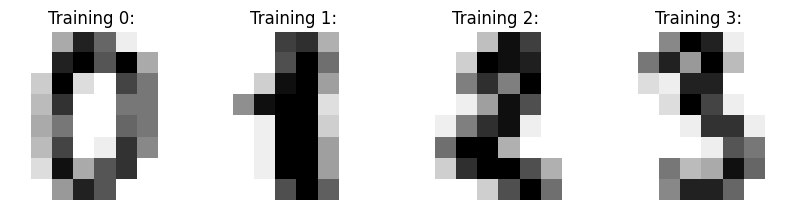

In [18]:
_,axes = plt.subplots(nrows = 1, ncols = 4, figsize = (10,3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap = plt.cm.gray_r, interpolation = "nearest")
  ax.set_title("Training %i: " % label) 

# Data Preprocessing

In [19]:
df.images.shape

(1797, 8, 8)

In [20]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [21]:
df.images[0].shape

(8, 8)

In [22]:
len(df.images)

1797

In [23]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [24]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [25]:
data[0].shape

(64,)

In [26]:
data.shape

(1797, 64)

In [28]:
data.min()

0.0

In [29]:
data.max()

16.0

In [30]:
data = data/16

In [31]:
data.min()

0.0

In [32]:
data.max()

1.0

In [33]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# Define target variable (y) and Feature Variables (X)

In [43]:
df.target

array([0, 1, 2, ..., 8, 9, 8])

# Test Train Split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(data, df.target, test_size = 0.3)

In [37]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# Modeling

In [39]:
rf = RandomForestClassifier()

In [40]:
rf.fit(x_train, y_train)

RandomForestClassifier()

# Prediction

In [41]:
y_pred = rf.predict(x_test)

In [42]:
y_pred

array([8, 7, 4, 8, 5, 9, 4, 2, 7, 6, 3, 4, 9, 9, 2, 4, 5, 6, 4, 9, 2, 2,
       1, 3, 1, 7, 4, 7, 7, 6, 5, 6, 3, 5, 1, 6, 3, 2, 0, 9, 8, 2, 7, 9,
       1, 6, 5, 9, 5, 7, 0, 3, 7, 7, 2, 1, 8, 1, 4, 8, 5, 6, 7, 7, 8, 0,
       7, 6, 4, 1, 5, 6, 0, 4, 7, 7, 7, 3, 3, 1, 8, 2, 6, 9, 6, 9, 2, 1,
       6, 9, 1, 0, 8, 8, 9, 5, 4, 2, 8, 3, 6, 5, 4, 2, 2, 6, 1, 4, 5, 6,
       1, 6, 5, 9, 2, 1, 9, 2, 8, 6, 4, 0, 3, 7, 2, 8, 6, 7, 3, 6, 5, 2,
       2, 9, 1, 6, 2, 7, 4, 9, 8, 1, 3, 7, 6, 0, 2, 3, 5, 5, 0, 7, 0, 7,
       6, 8, 9, 1, 0, 7, 0, 0, 0, 3, 4, 4, 2, 5, 8, 2, 9, 1, 0, 6, 7, 2,
       8, 8, 2, 6, 4, 1, 7, 6, 6, 4, 4, 2, 1, 0, 7, 4, 5, 7, 2, 6, 6, 4,
       3, 3, 8, 1, 1, 5, 4, 1, 5, 7, 6, 6, 3, 7, 8, 5, 0, 4, 7, 1, 3, 1,
       9, 1, 8, 0, 4, 3, 5, 4, 5, 5, 7, 1, 7, 9, 2, 4, 3, 2, 5, 7, 6, 4,
       9, 1, 7, 7, 4, 9, 7, 3, 1, 1, 2, 8, 0, 0, 9, 7, 9, 6, 0, 9, 5, 5,
       7, 7, 2, 8, 1, 7, 3, 3, 8, 9, 8, 3, 1, 4, 5, 4, 5, 6, 7, 3, 2, 2,
       0, 9, 0, 0, 1, 1, 8, 1, 7, 7, 3, 9, 1, 2, 9,

# Model Evaluation

In [45]:
confusion_matrix(y_test, y_pred)

array([[41,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 60,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  1, 46,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0, 46,  0,  2,  0,  2,  0,  0],
       [ 0,  0,  0,  0, 57,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  1,  0, 60,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 59,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 56,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  1, 45,  0],
       [ 0,  1,  0,  2,  0,  0,  0,  0,  2, 51]])

In [48]:
mean_absolute_error(y_test,y_pred)

0.13518518518518519

In [49]:
mean_absolute_percentage_error(y_test,y_pred)

0.03188786008230453

In [52]:
r2_score(y_test,y_pred)

0.9105904901273156

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        41
           1       0.94      0.98      0.96        61
           2       1.00      0.98      0.99        47
           3       0.94      0.90      0.92        51
           4       1.00      0.97      0.98        59
           5       0.95      0.98      0.97        61
           6       1.00      0.98      0.99        60
           7       0.93      1.00      0.97        56
           8       0.96      0.94      0.95        48
           9       0.98      0.91      0.94        56

    accuracy                           0.96       540
   macro avg       0.97      0.96      0.96       540
weighted avg       0.97      0.96      0.96       540



# Explanation